# Resultaten

In [1]:
#@title imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pickle

from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)

from collections import deque

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

/Users/pepijn/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [22]:
# !pip3 install --upgrade tensorflow
# !pip3 install tensorflow==25.0.1
# !pip3 install --upgrade pip


# help('modules')

import tensorflow as tf
print(tf.__version__)

2.15.1


In [2]:
def read(file):
    df = pd.read_csv(file, low_memory=False)
    df.columns = df.columns.str.strip()
    return df


def plot_loss(history, title='Loss per Epoch'):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


def evaluate_model_results(model, model_name, X_train, X_test, y_train_idx, y_test_idx, duration, future, dataset):
    df = pd.DataFrame(columns=['imbalance_price', 'predicted', 'test'])
    df['imbalance_price'] = [row['Imbalance'] for row in dataset[duration+future:]]

    # Predictions
    df.loc[y_train_idx, 'predicted'] = model.predict(X_train).flatten()
    df.loc[y_test_idx, 'predicted'] = model.predict(X_test).flatten()
    df.loc[y_train_idx, 'test'] = False
    df.loc[y_test_idx, 'test'] = True

    print(df.head(5))

    # Separate test/train results
    df_test = df[df['test'] == True]
    df_train = df[df['test'] == False]

    y_true = df_test['imbalance_price'].values
    y_pred = df_test['predicted'].values
    y_train = df_train['imbalance_price'].values
    y_pred_train = df_train['predicted'].values

    # Metrics
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mse_train = mean_squared_error(y_train, y_pred_train)

    mape = np.mean(np.abs((y_true[y_true != 0] - y_pred[y_true != 0]) / y_true[y_true != 0])) * 100
    nrmse = rmse / np.mean(y_true)
    nmae = mae / np.mean(y_true)

    # Print results
    print(f"\n Results for {model_name}")
    print(f"------------------------")
    print(f"R² Score:       {r2:.4f}")
    print(f"MSE (test):     {mse:.4f}")
    print(f"MSE (train):    {mse_train:.4f}")
    print(f"MAE:            {mae:.4f}")
    print(f"RMSE:           {rmse:.4f}")
    print(f"MAPE:           {mape:.2f}%")
    print(f"nRMSE (mean):   {nrmse:.4f}")
    print(f"nMAE (mean):    {nmae:.4f}")


def open_pickle(file):
    with open(file, 'rb') as file_pi:
        return pickle.load(file_pi)


# --- Load files --- #
file_path = '/Users/pepijn/Documents/Data'
df_samen = pd.read_csv(f'{file_path}/all_data.csv', low_memory=False)

In [3]:
def results(keras, hist, model_name,
            xtrain, xtest, indtrain, indtest,
            duration, future, dataset, time):

    model = load_model(keras)

    history = open_pickle(hist)
    plot_loss(history)

    X_train = open_pickle(xtrain)
    X_test = open_pickle(xtest)
    ind_train = open_pickle(indtrain)
    ind_test = open_pickle(indtest)
    dataset = open_pickle(dataset)

    evaluate_model_results(
        model=model, model_name=model_name,
        X_train=X_train, X_test=X_test,
        y_train_idx=ind_train, y_test_idx=ind_test,
        duration=duration, future=future,
        dataset=dataset
    )
    print("trainings time:", time)

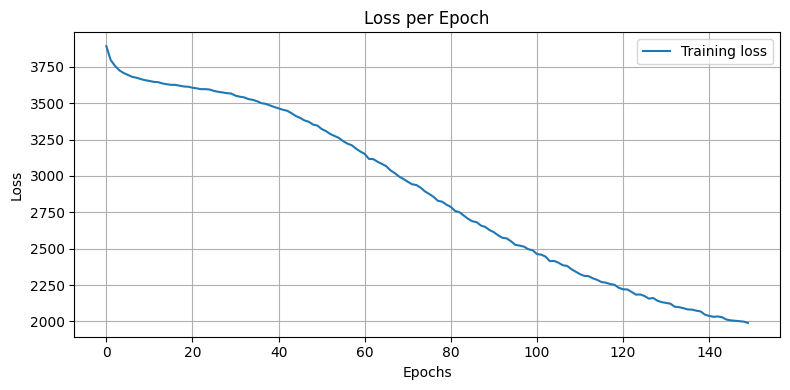

439/439 [==============================] - 100s 227ms/step
   imbalance_price   predicted   test
0          114.895  138.435013   True
1          112.156  133.405075  False
2           98.087   122.55011  False
3           77.703  104.332893  False
4           71.916  107.192146  False

 Results for 48 uur vanilla 6 lagen
------------------------
R² Score:       0.3770
MSE (test):     2564.3432
MSE (train):    2030.4743
MAE:            37.9642
RMSE:           50.6393
MAPE:           445.89%
nRMSE (mean):   -25.4079
nMAE (mean):    -19.0483
trainings time: /Users/pepijn/Documents/Data/vanilla/vanilla6_time.txt


In [29]:
### VANILLA - 48 hours ###
vanilla_xtrain = f'{file_path}/vanilla/vanilla_xtrain'
vanilla_xtest = f'{file_path}/vanilla/vanilla_xtest'
vanilla_indtrain = f'{file_path}/vanilla/vanilla_indtrain'
vanilla_indtest = f'{file_path}/vanilla/vanilla_indtest'
vanilla_dataset = f'{file_path}/vanilla/vanilla_dataset'

results(keras=f'{file_path}/vanilla/vanilla1.keras', hist=f'{file_path}/vanilla/vanillaHist1',
    model_name='48 uur vanilla 1 laag',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=48, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/vanilla1_time')

results(keras=f'{file_path}/vanilla/vanilla2.keras', hist=f'{file_path}/vanilla/vanillaHist2',
    model_name='48 uur vanilla 2 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=48, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/vanilla2_time')


results(keras=f'{file_path}/vanilla/vanilla3.keras', hist=f'{file_path}/vanilla/vanillaHist3',
    model_name='48 uur vanilla 3 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=48, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/vanilla3_time')

results(keras=f'{file_path}/vanilla/vanilla4.keras', hist=f'{file_path}/vanilla/vanillaHist4.txt',
    model_name='48 uur vanilla 4 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=48, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/vanilla4_time.txt')

results(keras=f'{file_path}/vanilla/vanilla5.keras', hist=f'{file_path}/vanilla/vanillaHist5.txt',
    model_name='48 uur vanilla 5 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=48, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/vanilla5_time.txt')

results(keras=f'{file_path}/vanilla/vanilla6.keras', hist=f'{file_path}/vanilla/vanillaHist6.txt',
    model_name='48 uur vanilla 6 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=48, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/vanilla6_time.txt')

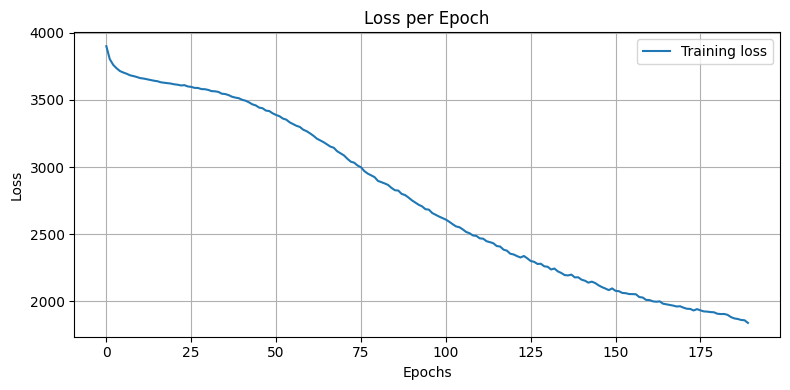

439/439 [==============================] - 52s 119ms/step
   imbalance_price   predicted   test
0           40.288   53.316429   True
1           30.228   58.051903  False
2           88.806   74.785957  False
3           99.691  123.428436  False
4          187.661  137.880859  False

 Results for 24 uur vanilla 6 lagen
------------------------
R² Score:       0.4025
MSE (test):     2398.0594
MSE (train):    1826.5270
MAE:            37.0959
RMSE:           48.9700
MAPE:           355.37%
nRMSE (mean):   -20.8436
nMAE (mean):    -15.7895
trainings time: /Users/pepijn/Documents/Data/vanilla/24vanilla6_time.txt


In [17]:
### VANILLA - 24 hours ###
vanilla_xtrain = f'{file_path}/vanilla/vanilla24_xtrain'
vanilla_xtest = f'{file_path}/vanilla/vanilla24_xtest'
vanilla_indtrain = f'{file_path}/vanilla/vanilla24_indtrain'
vanilla_indtest = f'{file_path}/vanilla/vanilla24_indtest'
vanilla_dataset = f'{file_path}/vanilla/vanilla24_dataset'

results(keras=f'{file_path}/vanilla/24vanilla1.keras', hist=f'{file_path}/vanilla/24vanillaHist1',
    model_name='24 uur vanilla 1 laag',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=24, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/24vanilla1_time')

results(keras=f'{file_path}/vanilla/24vanilla2.keras', hist=f'{file_path}/vanilla/24vanillaHist2',
    model_name='24 uur vanilla 2 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=24, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/24vanilla2_time')

results(keras=f'{file_path}/vanilla/24vanilla3.keras', hist=f'{file_path}/vanilla/24vanillaHist3',
    model_name='24 uur vanilla 3 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=24, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/24vanilla3_time')

results(keras=f'{file_path}/vanilla/24vanilla4.keras', hist=f'{file_path}/vanilla/24vanillaHist4',
    model_name='24 uur vanilla 4 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=24, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/24vanilla4_time')

results(keras=f'{file_path}/vanilla/24vanilla5.keras', hist=f'{file_path}/vanilla/24vanillaHist5',
    model_name='24 uur vanilla 5 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=24, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/24vanilla5_time')

results(keras=f'{file_path}/vanilla/24vanilla6.keras', hist=f'{file_path}/vanilla/24vanillaHist6.txt',
    model_name='24 uur vanilla 6 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=24, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/24vanilla6_time.txt')

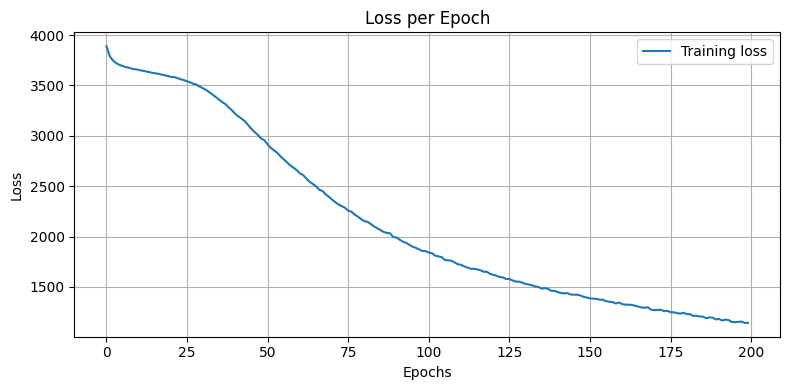

439/439 [==============================] - 2s 5ms/step
   imbalance_price  predicted   test
0          114.045 -32.471905   True
1          107.169  51.067593  False
2          126.382   81.91922  False
3          129.932  88.078323  False
4          116.233  96.018097  False

 Results for 12 uur vanilla 5 lagen
------------------------
R² Score:       0.4202
MSE (test):     2288.7905
MSE (train):    1087.8747
MAE:            36.0063
RMSE:           47.8413
MAPE:           370.14%
nRMSE (mean):   -39.4859
nMAE (mean):    -29.7179
trainings time: /Users/pepijn/Documents/Data/vanilla/12vanilla5_time.txt


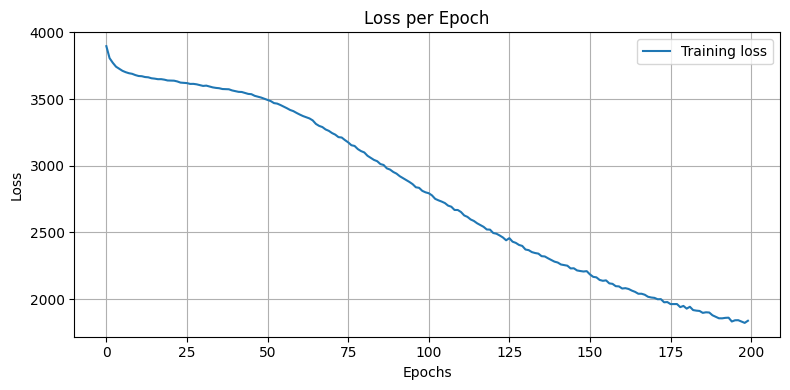

439/439 [==============================] - 6s 13ms/step
   imbalance_price   predicted   test
0          114.045   41.018517   True
1          107.169   99.375465  False
2          126.382   93.537399  False
3          129.932  114.111687  False
4          116.233  120.380669  False

 Results for 12 uur vanilla 6 lagen
------------------------
R² Score:       0.3304
MSE (test):     2643.4869
MSE (train):    1762.4434
MAE:            39.0892
RMSE:           51.4149
MAPE:           391.43%
nRMSE (mean):   -42.4354
nMAE (mean):    -32.2624
trainings time: /Users/pepijn/Documents/Data/vanilla/12vanilla6_time.txt


In [6]:
### VANILLA - 12 hours ###
vanilla_xtrain = f'{file_path}/vanilla/vanilla12_xtrain'
vanilla_xtest = f'{file_path}/vanilla/vanilla12_xtest'
vanilla_indtrain = f'{file_path}/vanilla/vanilla12_indtrain'
vanilla_indtest = f'{file_path}/vanilla/vanilla12_indtest'
vanilla_dataset = f'{file_path}/vanilla/vanilla12_dataset'

results(keras=f'{file_path}/vanilla/12vanilla1.keras', hist=f'{file_path}/vanilla/12vanillaHist1',
    model_name='12 uur vanilla 1 laag',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=12, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/12vanilla1_time')

results(keras=f'{file_path}/vanilla/12vanilla2.keras', hist=f'{file_path}/vanilla/12vanillaHist2',
    model_name='12 uur vanilla 2 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=12, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/12vanilla2_time')

results(keras=f'{file_path}/vanilla/12vanilla3.keras', hist=f'{file_path}/vanilla/12vanillaHist3',
    model_name='12 uur vanilla 3 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=12, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/12vanilla3_time')

results(keras=f'{file_path}/vanilla/12vanilla4.keras', hist=f'{file_path}/vanilla/12vanillaHist4',
    model_name='12 uur vanilla 4 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=12, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/12vanilla4_time')

results(keras=f'{file_path}/vanilla/12vanilla5.keras', hist=f'{file_path}/vanilla/12vanillaHist5.txt',
    model_name='12 uur vanilla 5 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=12, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/12vanilla5_time.txt')

results(keras=f'{file_path}/vanilla/12vanilla6.keras', hist=f'{file_path}/vanilla/12vanillaHist6.txt',
    model_name='12 uur vanilla 6 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=12, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/12vanilla6_time.txt')

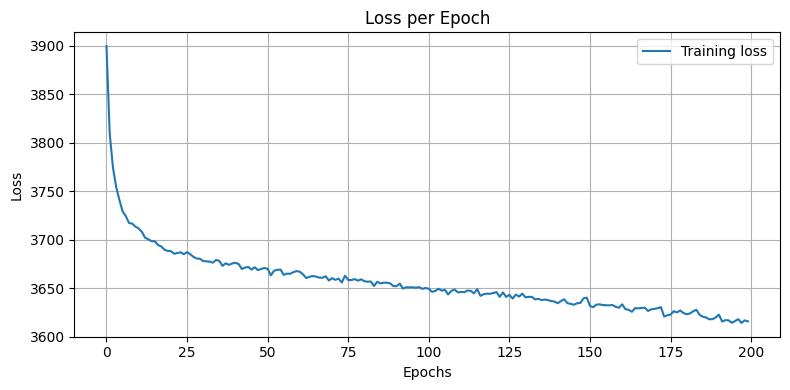

439/439 [==============================] - 2s 5ms/step
   imbalance_price  predicted   test
0           61.455   0.246346   True
1           55.943  15.943437  False
2           73.747  46.223595  False
3           52.452   27.49527  False
4          105.008    6.48128  False

 Results for 4 uur vanilla 6 lagen
------------------------
R² Score:       0.0938
MSE (test):     3583.0109
MSE (train):    3606.0503
MAE:            44.8759
RMSE:           59.8583
MAPE:           244.14%
nRMSE (mean):   -45.7909
nMAE (mean):    -34.3295
trainings time: /Users/pepijn/Documents/Data/vanilla/4vanilla6_time.txt


In [7]:
### VANILLA - 4 hours ###
vanilla_xtrain = f'{file_path}/vanilla/vanilla4_xtrain'
vanilla_xtest = f'{file_path}/vanilla/vanilla4_xtest'
vanilla_indtrain = f'{file_path}/vanilla/vanilla4_indtrain'
vanilla_indtest = f'{file_path}/vanilla/vanilla4_indtest'
vanilla_dataset = f'{file_path}/vanilla/vanilla4_dataset'

results(keras=f'{file_path}/vanilla/4vanilla1.keras', hist=f'{file_path}/vanilla/4vanillaHist1',
    model_name='4 uur vanilla 1 laag',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=4, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/4vanilla1_time')

results(keras=f'{file_path}/vanilla/4vanilla2.keras', hist=f'{file_path}/vanilla/4vanillaHist2',
    model_name='4 uur vanilla 2 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=4, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/4vanilla2_time')

results(keras=f'{file_path}/vanilla/4vanilla3.keras', hist=f'{file_path}/vanilla/4vanillaHist3',
    model_name='4 uur vanilla 3 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=4, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/4vanilla3_time')

results(keras=f'{file_path}/vanilla/4vanilla4.keras', hist=f'{file_path}/vanilla/4vanillaHist4',
    model_name='4 uur vanilla 4 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=4, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/4vanilla4_time')

results(keras=f'{file_path}/vanilla/4vanilla5.keras', hist=f'{file_path}/vanilla/4vanillaHist5.txt',
    model_name='4 uur vanilla 5 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=4, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/4vanilla5_time.txt')

results(keras=f'{file_path}/vanilla/4vanilla6.keras', hist=f'{file_path}/vanilla/4vanillaHist6.txt',
    model_name='4 uur vanilla 6 lagen',
    xtrain=vanilla_xtrain, xtest=vanilla_xtest,
    indtrain=vanilla_indtrain, indtest=vanilla_indtest,
    duration=4, future=4, dataset=vanilla_dataset, time=f'{file_path}/vanilla/4vanilla6_time.txt')

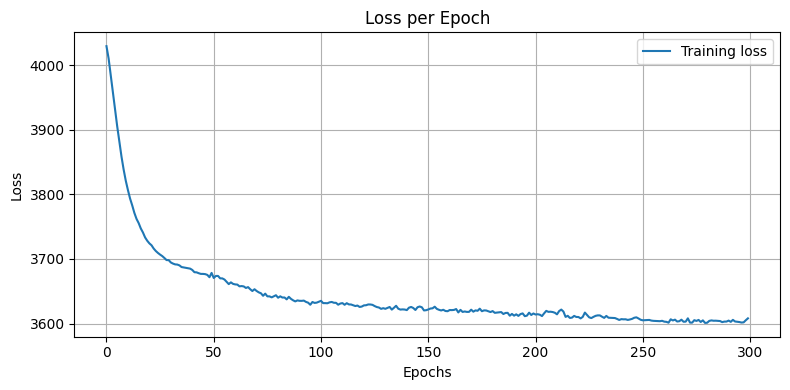

3943/3943 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
   imbalance_price  predicted   test
0          114.895  50.094109   True
1          112.156  49.769379  False
2           98.087  45.609657  False
3           77.703  34.783707  False
4           71.916   34.98732  False

 Results for 48 uur lstm 1 laag
------------------------
R² Score:       0.1088
MSE (test):     3668.3077
MSE (train):    3605.5949
MAE:            44.6602
RMSE:           60.5666
MAPE:           456.24%
nRMSE (mean):   -30.3889
nMAE (mean):    -22.4079
trainings time: /Users/pepijn/Documents/Data/lstm/lstm1_time


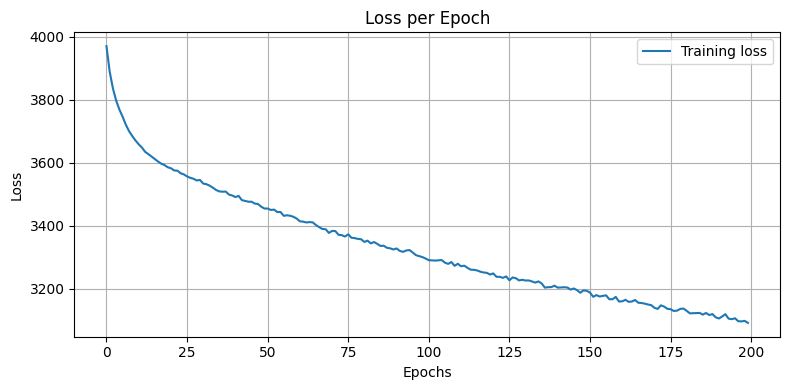

3943/3943 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
   imbalance_price  predicted   test
0          114.895  14.415846   True
1          112.156  14.094988  False
2           98.087  13.404348  False
3           77.703  15.013237  False
4           71.916  23.122404  False

 Results for 48 uur lstm 2 lagen
------------------------
R² Score:       0.1848
MSE (test):     3355.3269
MSE (train):    3074.4030
MAE:            42.9585
RMSE:           57.9252
MAPE:           453.84%
nRMSE (mean):   -29.0636
nMAE (mean):    -21.5541
trainings time: /Users/pepijn/Documents/Data/lstm/lstm2_time


In [5]:
### LSTM - 48 hours ###
lstm_xtrain = f'{file_path}/lstm/lstm_xtrain2'
lstm_xtest = f'{file_path}/lstm/lstm_xtest2'
lstm_indtrain = f'{file_path}/lstm/lstm_indtrain2'
lstm_indtest = f'{file_path}/lstm/lstm_indtest2'
lstm_dataset = f'{file_path}/lstm/lstm_dataset2'

results(keras=f'{file_path}/lstm/lstm1.keras', hist=f'{file_path}/lstm/lstmHist1',
    model_name='48 uur lstm 1 laag',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=48, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/lstm1_time')

results(keras=f'{file_path}/lstm/lstm2.keras', hist=f'{file_path}/lstm/lstmHist2',
    model_name='48 uur lstm 2 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=48, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/lstm2_time')

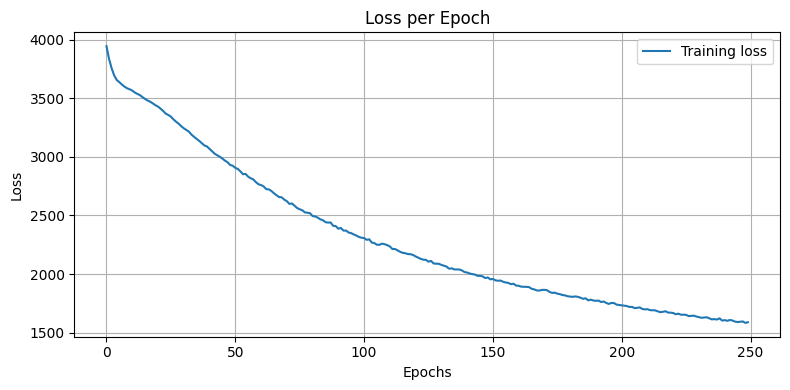

439/439 [==============================] - 5s 10ms/step
   imbalance_price   predicted   test
0          114.895  100.823044   True
1          112.156   93.435081  False
2           98.087   80.625641  False
3           77.703   54.368202  False
4           71.916   71.445633  False

 Results for 48 uur lstm 3 lagen
------------------------
R² Score:       0.4202
MSE (test):     2386.4471
MSE (train):    1520.7813
MAE:            36.5777
RMSE:           48.8513
MAPE:           625.07%
nRMSE (mean):   -24.5108
nMAE (mean):    -18.3526
trainings time: /Users/pepijn/Documents/Data/lstm/lstm3_time


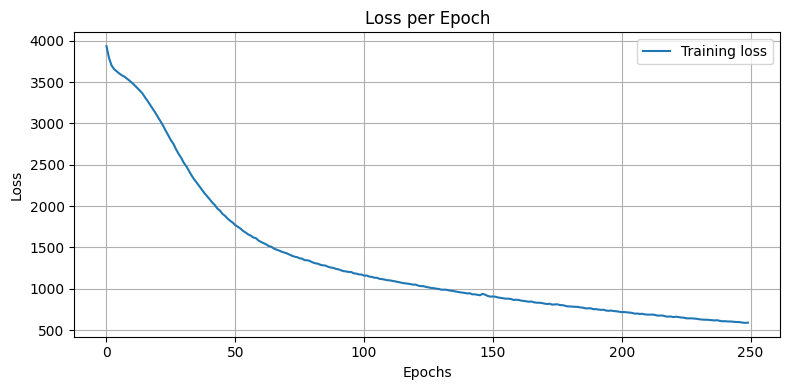

439/439 [==============================] - 12s 26ms/step
   imbalance_price   predicted   test
0          114.895  126.244026   True
1          112.156  117.267044  False
2           98.087   89.688263  False
3           77.703   72.992622  False
4           71.916   63.802193  False

 Results for 48 uur lstm 4 lagen
------------------------
R² Score:       0.5231
MSE (test):     1963.0746
MSE (train):    560.0016
MAE:            32.2152
RMSE:           44.3066
MAPE:           507.51%
nRMSE (mean):   -22.2305
nMAE (mean):    -16.1638
trainings time: /Users/pepijn/Documents/Data/lstm/lstm4_time


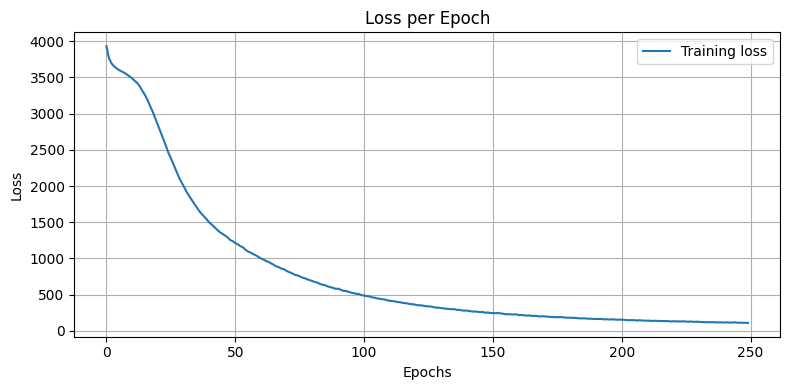

439/439 [==============================] - 28s 63ms/step
   imbalance_price  predicted   test
0          114.895  98.657532   True
1          112.156    93.6847  False
2           98.087  90.692612  False
3           77.703  71.768143  False
4           71.916  76.427376  False

 Results for 48 uur lstm 5 lagen
------------------------
R² Score:       0.5475
MSE (test):     1862.5721
MSE (train):    107.1004
MAE:            31.5696
RMSE:           43.1575
MAPE:           534.48%
nRMSE (mean):   -21.6540
nMAE (mean):    -15.8398
trainings time: /Users/pepijn/Documents/Data/lstm/lstm5_time


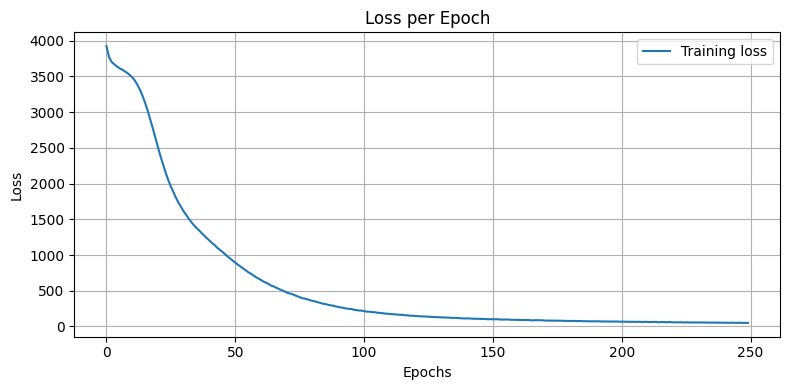

439/439 [==============================] - 70s 158ms/step
   imbalance_price   predicted   test
0          114.895  114.851227   True
1          112.156  109.306564  False
2           98.087   96.355408  False
3           77.703   75.692474  False
4           71.916   79.993416  False

 Results for 48 uur lstm 6 lagen
------------------------
R² Score:       0.5965
MSE (test):     1660.8706
MSE (train):    51.3510
MAE:            29.8512
RMSE:           40.7538
MAPE:           401.97%
nRMSE (mean):   -20.4479
nMAE (mean):    -14.9777
trainings time: /Users/pepijn/Documents/Data/lstm/lstm6_time


In [14]:
### LSTM - 48 uur ###
lstm_xtrain = f'{file_path}/lstm/lstm_xtrain'
lstm_xtest = f'{file_path}/lstm/lstm_xtest'
lstm_indtrain = f'{file_path}/lstm/lstm_indtrain'
lstm_indtest = f'{file_path}/lstm/lstm_indtest'
lstm_dataset = f'{file_path}/lstm/lstm_dataset'

results(keras=f'{file_path}/lstm/lstm3.keras', hist=f'{file_path}/lstm/lstmHist3',
    model_name='48 uur lstm 3 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=48, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/lstm3_time')

results(keras=f'{file_path}/lstm/lstm4.keras', hist=f'{file_path}/lstm/lstmHist4',
    model_name='48 uur lstm 4 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=48, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/lstm4_time')

results(keras=f'{file_path}/lstm/lstm5.keras', hist=f'{file_path}/lstm/lstmHist5',
    model_name='48 uur lstm 5 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=48, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/lstm5_time')

results(keras=f'{file_path}/lstm/lstm6.keras', hist=f'{file_path}/lstm/lstmHist6',
    model_name='48 uur lstm 6 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=48, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/lstm6_time')

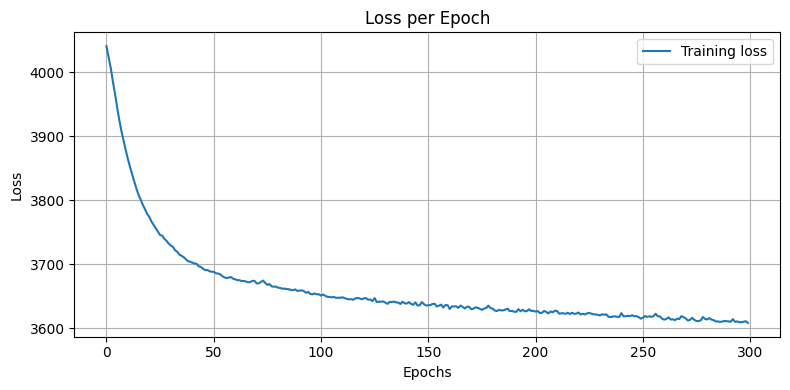

3944/3944 ━━━━━━━━━━━━━━━━━━━━ 3s 698us/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
   imbalance_price  predicted   test
0           40.288  41.399014   True
1           30.228  41.399059  False
2           88.806   41.40168  False
3           99.691  41.542103  False
4          187.661   45.37611  False

 Results for 24 uur lstm 1 laag
------------------------
R² Score:       0.1043
MSE (test):     3594.8259
MSE (train):    3602.9024
MAE:            44.6885
RMSE:           59.9569
MAPE:           263.16%
nRMSE (mean):   -25.5201
nMAE (mean):    -19.0212
trainings time: /Users/pepijn/Documents/Data/lstm/24lstm1_time


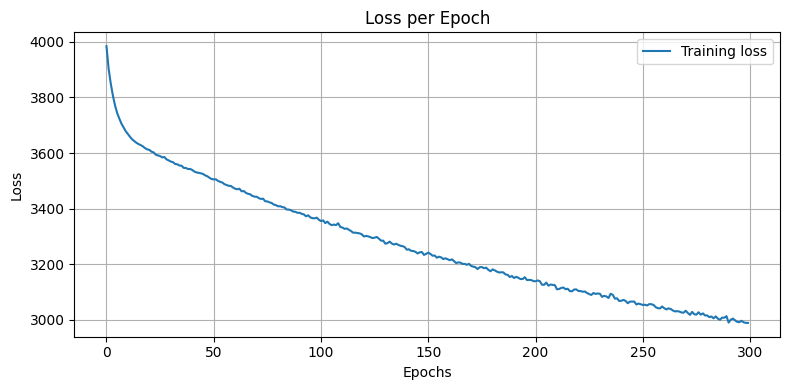

3944/3944 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   imbalance_price   predicted   test
0           40.288  112.369781   True
1           30.228  112.374146  False
2           88.806  112.181053  False
3           99.691  112.119919  False
4          187.661  110.815742  False

 Results for 24 uur lstm 2 lagen
------------------------
R² Score:       0.1703
MSE (test):     3330.1026
MSE (train):    2973.6877
MAE:            43.5038
RMSE:           57.7070
MAPE:           307.09%
nRMSE (mean):   -24.5625
nMAE (mean):    -18.5170
trainings time: /Users/pepijn/Documents/Data/lstm/24lstm2_time


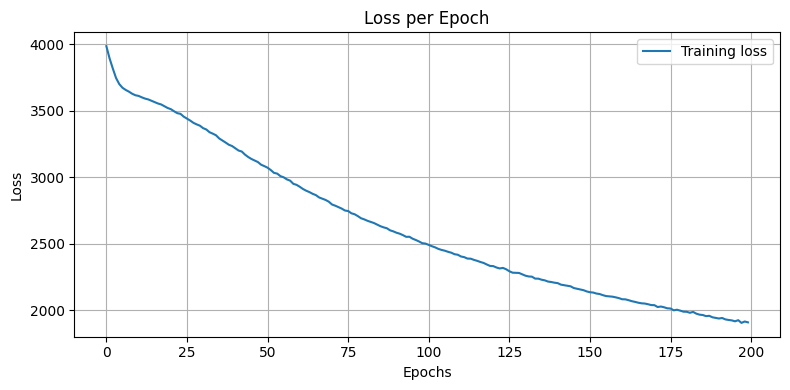

3944/3944 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
   imbalance_price   predicted   test
0           40.288   61.521633   True
1           30.228  106.800728  False
2           88.806  129.106583  False
3           99.691  136.841553  False
4          187.661  143.822678  False

 Results for 24 uur lstm 3 lagen
------------------------
R² Score:       0.3328
MSE (test):     2677.8143
MSE (train):    1871.7259
MAE:            39.2863
RMSE:           51.7476
MAPE:           352.17%
nRMSE (mean):   -22.0259
nMAE (mean):    -16.7219
trainings time: /Users/pepijn/Documents/Data/lstm/24lstm3_time


FileNotFoundError: [Errno 2] No such file or directory: '/Users/pepijn/Documents/Data/lstm/24lstmHist4'

In [21]:
### LSTM - 24 hours ###
lstm_xtrain = f'{file_path}/lstm/lstm24_xtrain'
lstm_xtest = f'{file_path}/lstm/lstm24_xtest'
lstm_indtrain = f'{file_path}/lstm/lstm24_indtrain'
lstm_indtest = f'{file_path}/lstm/lstm24_indtest'
lstm_dataset = f'{file_path}/lstm/lstm24_dataset'

results(keras=f'{file_path}/lstm/24lstm1.keras', hist=f'{file_path}/lstm/24lstmHist1',
    model_name='24 uur lstm 1 laag',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=24, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/24lstm1_time')

results(keras=f'{file_path}/lstm/24lstm2.keras', hist=f'{file_path}/lstm/24lstmHist2',
    model_name='24 uur lstm 2 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=24, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/24lstm2_time')

results(keras=f'{file_path}/lstm/24lstm3.keras', hist=f'{file_path}/lstm/24lstmHist3',
    model_name='24 uur lstm 3 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=24, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/24lstm3_time')


results(keras=f'{file_path}/lstm/24lstm4.keras', hist=f'{file_path}/lstm/24lstmHist4',
    model_name='24 uur lstm 4 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=24, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/24lstm4_time')

results(keras=f'{file_path}/lstm/24lstm5.keras', hist=f'{file_path}/lstm/24lstmHist5',
    model_name='24 uur lstm 5 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=24, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/24lstm5_time')

results(keras=f'{file_path}/lstm/24lstm6.keras', hist=f'{file_path}/lstm/24lstmHist6',
    model_name='24 uur lstm 6 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=24, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/24lstm6_time')

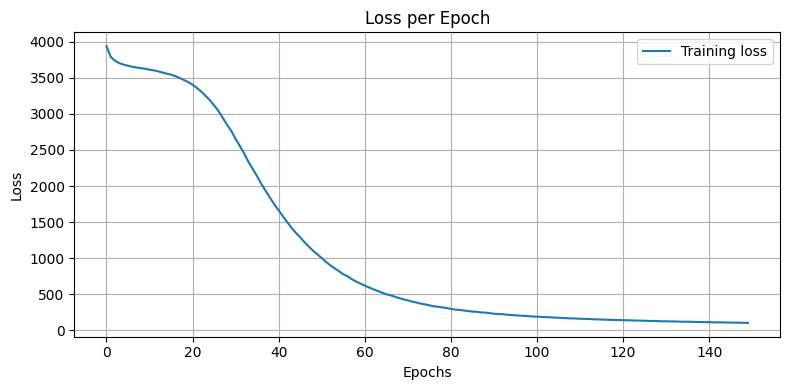

439/439 [==============================] - 59s 130ms/step
   imbalance_price   predicted   test
0          114.045   63.675522   True
1          107.169   96.625725  False
2          126.382  133.298615  False
3          129.932  111.343468  False
4          116.233  102.395149  False

 Results for 12 uur lstm 6 lagen
------------------------
R² Score:       0.4803
MSE (test):     2051.4952
MSE (train):    102.2232
MAE:            33.8194
RMSE:           45.2934
MAPE:           343.01%
nRMSE (mean):   -37.3830
nMAE (mean):    -27.9129
trainings time: /Users/pepijn/Documents/Data/lstm/12lstm6_time.txt


In [25]:
### LSTM - 12 hours ###
lstm_xtrain = f'{file_path}/lstm/lstm12_xtrain2'
lstm_xtest = f'{file_path}/lstm/lstm12_xtest2.txt'
lstm_indtrain = f'{file_path}/lstm/lstm12_indtrain2.txt'
lstm_indtest = f'{file_path}/lstm/lstm12_indtest2.txt'
lstm_dataset = f'{file_path}/lstm/lstm12_dataset2'

results(keras=f'{file_path}/lstm/12lstm1.keras', hist=f'{file_path}/lstm/12lstmHist1',
    model_name='12 uur lstm 1 laag',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=12, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/12lstm1_time')

results(keras=f'{file_path}/lstm/12lstm2.keras', hist=f'{file_path}/lstm/12lstmHist2',
    model_name='12 uur lstm 2 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=12, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/12lstm2_time')

results(keras=f'{file_path}/lstm/12lstm3.keras', hist=f'{file_path}/lstm/12lstmHist3',
    model_name='12 uur lstm 3 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=12, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/12lstm3_time')


results(keras=f'{file_path}/lstm/12lstm4.keras', hist=f'{file_path}/lstm/12lstmHist4.txt',
    model_name='12 uur lstm 4 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=12, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/12lstm4_time.txt')

results(keras=f'{file_path}/lstm/12lstm5.keras', hist=f'{file_path}/lstm/12lstmHist5.txt',
    model_name='12 uur lstm 5 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=12, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/12lstm5_time.txt')

results(keras=f'{file_path}/lstm/12lstm6.keras', hist=f'{file_path}/lstm/12lstmHist6',
    model_name='12 uur lstm 6 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=12, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/12lstm6_time.txt')

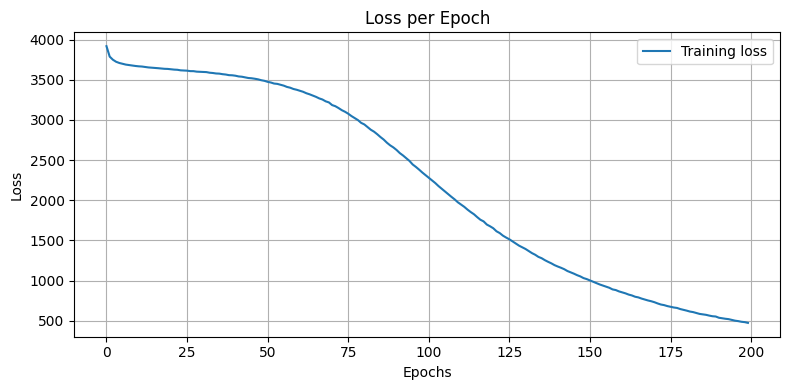

3945/3945 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
   imbalance_price  predicted   test
0           61.455  -8.269605   True
1           55.943  69.680962  False
2           73.747  76.264915  False
3           52.452   52.87513  False
4          105.008  98.912453  False

 Results for 4 uur lstm 5 lagen
------------------------
R² Score:       -0.2369
MSE (test):     4890.6100
MSE (train):    446.7890
MAE:            53.5178
RMSE:           69.9329
MAPE:           695.62%
nRMSE (mean):   -53.4979
nMAE (mean):    -40.9405
trainings time: /Users/pepijn/Documents/Data/lstm/4lstm5_time


ValueError: File not found: filepath=/Users/pepijn/Documents/Data/lstm/4lstm6.keras. Please ensure the file is an accessible `.keras` zip file.

In [8]:
### LSTM - 4 hours ###
lstm_xtrain = f'{file_path}/lstm/lstm4_xtrain'
lstm_xtest = f'{file_path}/lstm/lstm4_xtest'
lstm_indtrain = f'{file_path}/lstm/lstm4_indtrain'
lstm_indtest = f'{file_path}/lstm/lstm4_indtest'
lstm_dataset = f'{file_path}/lstm/lstm4_dataset'

results(keras=f'{file_path}/lstm/4lstm1.keras', hist=f'{file_path}/lstm/4lstmHist1',
    model_name='4 uur lstm 1 laag',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=4, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/4lstm1_time')

results(keras=f'{file_path}/lstm/4lstm2.keras', hist=f'{file_path}/lstm/4lstmHist2',
    model_name='4 uur lstm 2 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=4, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/4lstm2_time')

results(keras=f'{file_path}/lstm/4lstm3.keras', hist=f'{file_path}/lstm/4lstmHist3',
    model_name='4 uur lstm 3 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=4, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/4lstm3_time')


results(keras=f'{file_path}/lstm/4lstm4.keras', hist=f'{file_path}/lstm/4lstmHist4',
    model_name='4 uur lstm 4 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=4, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/4lstm4_time')


results(keras=f'{file_path}/lstm/4lstm5.keras', hist=f'{file_path}/lstm/4lstmHist5',
    model_name='4 uur lstm 5 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=4, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/4lstm5_time')

results(keras=f'{file_path}/lstm/4lstm6.keras', hist=f'{file_path}/lstm/4lstmHist6',
    model_name='4 uur lstm 6 lagen',
    xtrain=lstm_xtrain, xtest=lstm_xtest,
    indtrain=lstm_indtrain, indtest=lstm_indtest,
    duration=4, future=4, dataset=lstm_dataset, time=f'{file_path}/lstm/4lstm6_time')

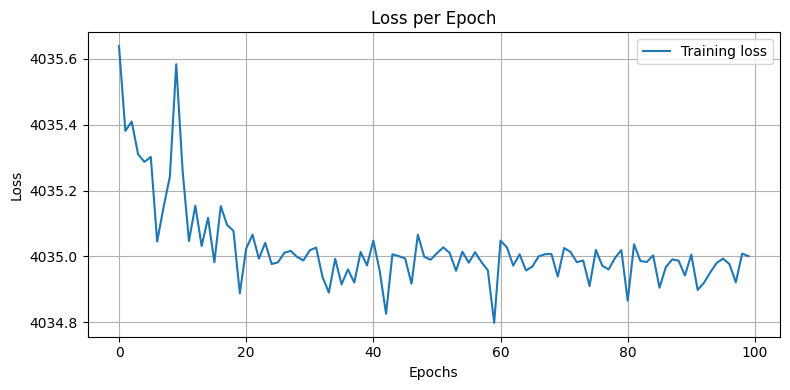

439/439 [==============================] - 270s 609ms/step
   imbalance_price predicted   test
0          114.895 -1.879737   True
1          112.156 -1.879737  False
2           98.087 -1.879737  False
3           77.703 -1.879737  False
4           71.916 -1.879737  False

 Results for 48 uur gru 6 lagen
------------------------
R² Score:       -0.0001
MSE (test):     4116.3149
MSE (train):    4034.8412
MAE:            47.5501
RMSE:           64.1585
MAPE:           132.40%
nRMSE (mean):   -32.1911
nMAE (mean):    -23.8579
trainings time: /Users/pepijn/Documents/Data/gru/gru6_time.txt


In [24]:
### GRU - 48 hours ###
gru_xtrain = f'{file_path}/gru/gru_xtrain'
gru_xtest = f'{file_path}/gru/gru_xtest'
gru_indtrain = f'{file_path}/gru/gru_indtrain'
gru_indtest = f'{file_path}/gru/gru_indtest'
gru_dataset = f'{file_path}/gru/gru_dataset'


results(keras=f'{file_path}/gru/gru1.keras', hist=f'{file_path}/gru/gruHist1',
    model_name='48 uur gru 1 laag',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=48, future=4, dataset=gru_dataset, time=f'{file_path}/gru/gru1_time')

results(keras=f'{file_path}/gru/gru2.keras', hist=f'{file_path}/gru/gruHist2',
    model_name='48 uur gru 2 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=48, future=4, dataset=gru_dataset, time=f'{file_path}/gru/gru2_time')


results(keras=f'{file_path}/gru/gru3.keras', hist=f'{file_path}/gru/gruHist3',
    model_name='48 uur gru 3 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=48, future=4, dataset=gru_dataset, time=f'{file_path}/gru/gru3_time')


results(keras=f'{file_path}/gru/gru4.keras', hist=f'{file_path}/gru/gruHist4',
    model_name='48 uur gru 4 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=48, future=4, dataset=gru_dataset, time=f'{file_path}/gru/gru4_time')

results(keras=f'{file_path}/gru/gru5.keras', hist=f'{file_path}/gru/gruHist5.txt',
    model_name='48 uur gru 5 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=48, future=4, dataset=gru_dataset, time=f'{file_path}/gru/gru5_time.txt')

results(keras=f'{file_path}/gru/gru6.keras', hist=f'{file_path}/gru/gruHist6',
    model_name='48 uur gru 6 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=48, future=4, dataset=gru_dataset, time=f'{file_path}/gru/gru6_time.txt')

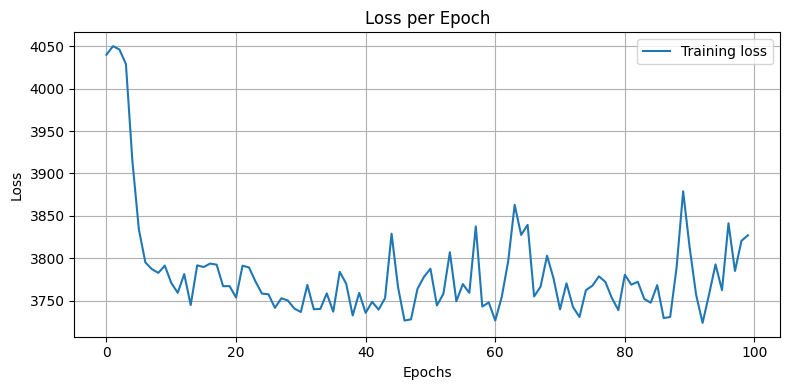

439/439 [==============================] - 51s 116ms/step
   imbalance_price  predicted   test
0           40.288  30.829189   True
1           30.228  31.295094  False
2           88.806  31.446705  False
3           99.691  32.263477  False
4          187.661  32.158119  False

 Results for 24 uur gru 5 lagen
------------------------
R² Score:       0.0759
MSE (test):     3709.0168
MSE (train):    3732.3009
MAE:            45.5720
RMSE:           60.9017
MAPE:           254.75%
nRMSE (mean):   -25.9222
nMAE (mean):    -19.3973
trainings time: /Users/pepijn/Documents/Data/gru/24gru5_time.txt


In [35]:
### GRU - 24 hours ###
gru_xtrain = f'{file_path}/gru/gru24_xtrain2'
gru_xtest = f'{file_path}/gru/gru24_xtest2'
gru_indtrain = f'{file_path}/gru/gru24_indtrain2.txt'
gru_indtest = f'{file_path}/gru/gru24_indtest2.txt'
gru_dataset = f'{file_path}/gru/gru24_dataset2'


results(keras=f'{file_path}/gru/24gru1.keras', hist=f'{file_path}/gru/24gruHist1',
    model_name='24 uur gru 1 laag',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=24, future=4, dataset=gru_dataset, time=f'{file_path}/gru/24gru1_time')

results(keras=f'{file_path}/gru/24gru2.keras', hist=f'{file_path}/gru/24gruHist2',
    model_name='24 uur gru 2 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=24, future=4, dataset=gru_dataset, time=f'{file_path}/gru/24gru2_time')


results(keras=f'{file_path}/gru/24gru3.keras', hist=f'{file_path}/gru/24gruHist3',
    model_name='24 uur gru 3 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=24, future=4, dataset=gru_dataset, time=f'{file_path}/gru/24gru3_time')


results(keras=f'{file_path}/gru/24gru4.keras', hist=f'{file_path}/gru/24gruHist4',
    model_name='24 uur gru 4 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=24, future=4, dataset=gru_dataset, time=f'{file_path}/gru/24gru4_time')

results(keras=f'{file_path}/gru/24gru5.keras', hist=f'{file_path}/gru/24gruHist5.txt',
    model_name='24 uur gru 5 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=24, future=4, dataset=gru_dataset, time=f'{file_path}/gru/24gru5_time.txt')

results(keras=f'{file_path}/gru/24gru6.keras', hist=f'{file_path}/gru/24gruHist6',
    model_name='24 uur gru 6 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=24, future=4, dataset=gru_dataset, time=f'{file_path}/gru/24gru6_time')

In [30]:
### GRU - 12 hours ###
gru_xtrain = f'{file_path}/gru/gru12_xtrain'
gru_xtest = f'{file_path}/gru/gru12_xtest'
gru_indtrain = f'{file_path}/gru/gru12_indtrain'
gru_indtest = f'{file_path}/gru/gru12_indtest'
gru_dataset = f'{file_path}/gru/gru12_dataset'


results(keras=f'{file_path}/gru/12gru1.keras', hist=f'{file_path}/gru/12gruHist1',
    model_name='12 uur gru 1 laag',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=12, future=4, dataset=gru_dataset, time=f'{file_path}/gru/12gru1_time')

results(keras=f'{file_path}/gru/12gru2.keras', hist=f'{file_path}/gru/12gruHist2',
    model_name='12 uur gru 2 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=12, future=4, dataset=gru_dataset, time=f'{file_path}/gru/12gru2_time')


results(keras=f'{file_path}/gru/12gru3.keras', hist=f'{file_path}/gru/12gruHist3',
    model_name='12 uur gru 3 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=12, future=4, dataset=gru_dataset, time=f'{file_path}/gru/12gru3_time')


results(keras=f'{file_path}/gru/12gru4.keras', hist=f'{file_path}/gru/12gruHist4',
    model_name='12 uur gru 4 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=12, future=4, dataset=gru_dataset, time=f'{file_path}/gru/12gru4_time')


results(keras=f'{file_path}/gru/12gru5.keras', hist=f'{file_path}/gru/12gruHist5',
    model_name='12 uur gru 5 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=12, future=4, dataset=gru_dataset, time=f'{file_path}/gru/12gru5_time')

results(keras=f'{file_path}/gru/12gru6.keras', hist=f'{file_path}/gru/12gruHist6.txt',
    model_name='12 uur gru 6 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=12, future=4, dataset=gru_dataset, time=f'{file_path}/gru/12gru6_time.txt')

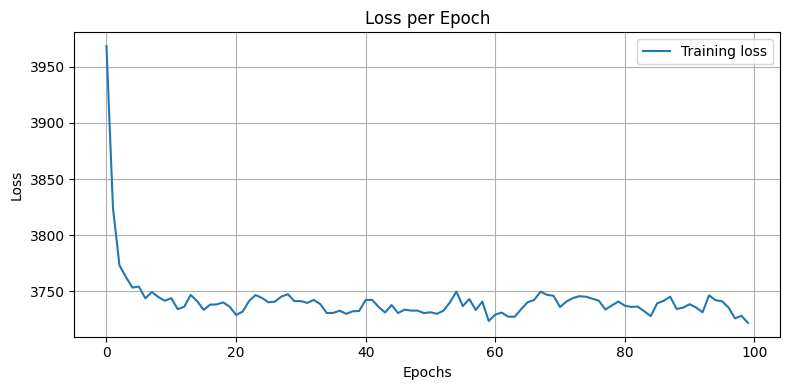

3945/3945 ━━━━━━━━━━━━━━━━━━━━ 1s 310us/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
   imbalance_price  predicted   test
0           61.455  11.230766   True
1           55.943  37.589535  False
2           73.747  36.577351  False
3           52.452  23.783632  False
4          105.008  29.256792  False

 Results for 4 uur gru 1 laag
------------------------
R² Score:       0.0788
MSE (test):     3642.6416
MSE (train):    3726.5166
MAE:            45.3542
RMSE:           60.3543
MAPE:           221.40%
nRMSE (mean):   -46.1704
nMAE (mean):    -34.6955
trainings time: /Users/pepijn/Documents/Data/gru/4gru1_time


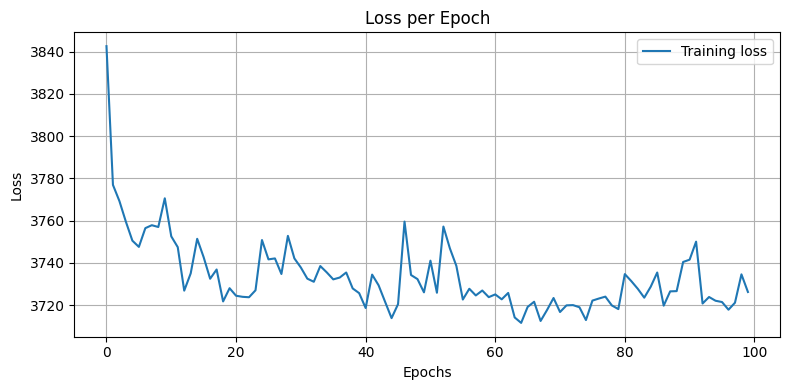

3945/3945 ━━━━━━━━━━━━━━━━━━━━ 2s 482us/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
   imbalance_price  predicted   test
0           61.455   6.425977   True
1           55.943  19.420471  False
2           73.747  20.700157  False
3           52.452  16.725189  False
4          105.008  20.814348  False

 Results for 4 uur gru 2 lagen
------------------------
R² Score:       0.0755
MSE (test):     3655.6201
MSE (train):    3721.9796
MAE:            45.3520
RMSE:           60.4617
MAPE:           265.25%
nRMSE (mean):   -46.2526
nMAE (mean):    -34.6938
trainings time: /Users/pepijn/Documents/Data/gru/4gru2_time


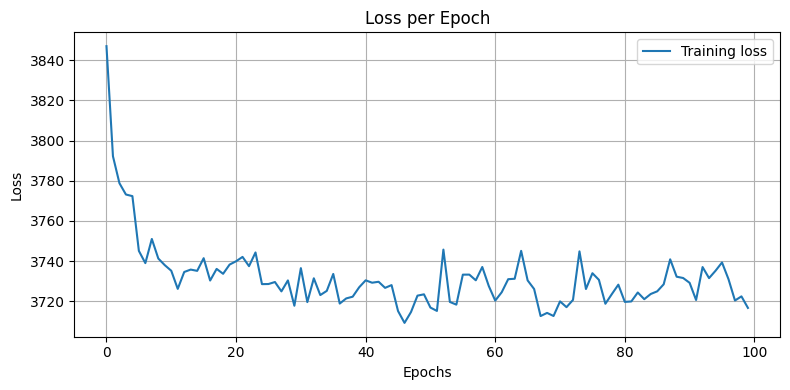

3945/3945 ━━━━━━━━━━━━━━━━━━━━ 4s 910us/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
   imbalance_price  predicted   test
0           61.455  -0.282243   True
1           55.943  23.276451  False
2           73.747  27.020721  False
3           52.452   24.86849  False
4          105.008  11.249261  False

 Results for 4 uur gru 3 lagen
------------------------
R² Score:       0.0816
MSE (test):     3631.4824
MSE (train):    3716.7194
MAE:            45.2185
RMSE:           60.2618
MAPE:           257.64%
nRMSE (mean):   -46.0996
nMAE (mean):    -34.5917
trainings time: /Users/pepijn/Documents/Data/gru/4gru3_time


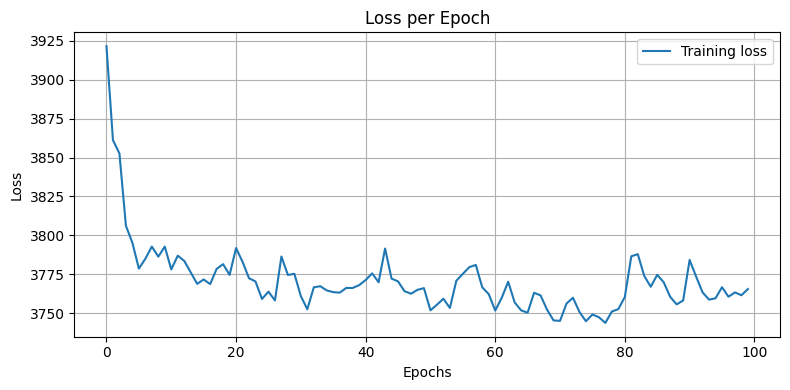

3945/3945 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   imbalance_price  predicted   test
0           61.455  -8.251871   True
1           55.943  16.682348  False
2           73.747  16.053278  False
3           52.452  10.882533  False
4          105.008  21.571602  False

 Results for 4 uur gru 4 lagen
------------------------
R² Score:       0.0513
MSE (test):     3751.2920
MSE (train):    3841.8843
MAE:            46.1790
RMSE:           61.2478
MAPE:           242.62%
nRMSE (mean):   -46.8539
nMAE (mean):    -35.3264
trainings time: /Users/pepijn/Documents/Data/gru/4gru4_time


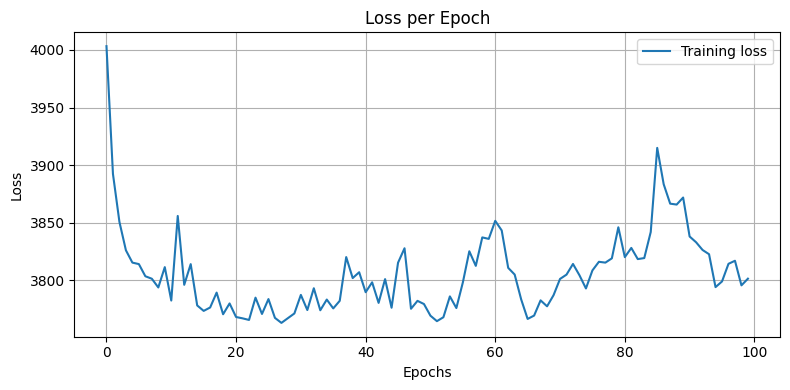

3945/3945 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
   imbalance_price  predicted   test
0           61.455   1.171992   True
1           55.943  22.025833  False
2           73.747  28.864803  False
3           52.452   2.855252  False
4          105.008   4.681211  False

 Results for 4 uur gru 5 lagen
------------------------
R² Score:       0.0466
MSE (test):     3769.7774
MSE (train):    3845.4678
MAE:            46.2923
RMSE:           61.3985
MAPE:           300.16%
nRMSE (mean):   -46.9692
nMAE (mean):    -35.4131
trainings time: /Users/pepijn/Documents/Data/gru/4gru5_time


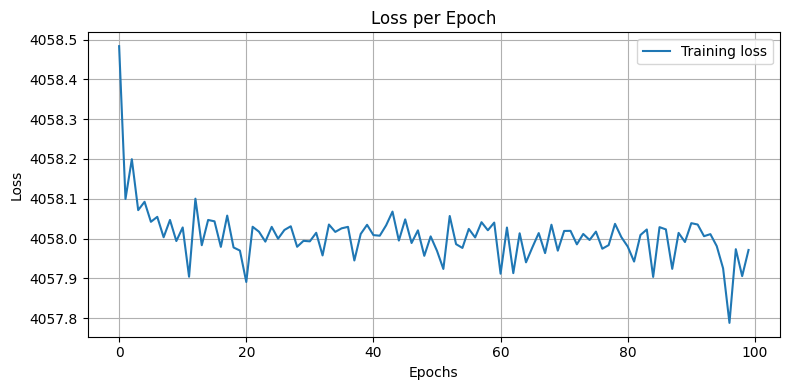

3945/3945 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
   imbalance_price predicted   test
0           61.455 -2.106775   True
1           55.943 -2.106775  False
2           73.747 -2.106775  False
3           52.452 -2.106775  False
4          105.008 -2.106775  False

 Results for 4 uur gru 6 lagen
------------------------
R² Score:       -0.0002
MSE (test):     3954.6821
MSE (train):    4057.9556
MAE:            47.5958
RMSE:           62.8863
MAPE:           127.01%
nRMSE (mean):   -48.1073
nMAE (mean):    -36.4103
trainings time: /Users/pepijn/Documents/Data/gru/4gru6_time


In [30]:
### GRU - 4 hours ###
gru_xtrain = f'{file_path}/gru/gru4_xtrain'
gru_xtest = f'{file_path}/gru/gru4_xtest'
gru_indtrain = f'{file_path}/gru/gru4_indtrain'
gru_indtest = f'{file_path}/gru/gru4_indtest'
gru_dataset = f'{file_path}/gru/gru4_dataset'


results(keras=f'{file_path}/gru/4gru1.keras', hist=f'{file_path}/gru/4gruHist1',
    model_name='4 uur gru 1 laag',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=4, future=4, dataset=gru_dataset, time=f'{file_path}/gru/4gru1_time')

results(keras=f'{file_path}/gru/4gru2.keras', hist=f'{file_path}/gru/4gruHist2',
    model_name='4 uur gru 2 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=4, future=4, dataset=gru_dataset, time=f'{file_path}/gru/4gru2_time')


results(keras=f'{file_path}/gru/4gru3.keras', hist=f'{file_path}/gru/4gruHist3',
    model_name='4 uur gru 3 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=4, future=4, dataset=gru_dataset, time=f'{file_path}/gru/4gru3_time')


results(keras=f'{file_path}/gru/4gru4.keras', hist=f'{file_path}/gru/4gruHist4',
    model_name='4 uur gru 4 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=4, future=4, dataset=gru_dataset, time=f'{file_path}/gru/4gru4_time')


results(keras=f'{file_path}/gru/4gru5.keras', hist=f'{file_path}/gru/4gruHist5',
    model_name='4 uur gru 5 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=4, future=4, dataset=gru_dataset, time=f'{file_path}/gru/4gru5_time')


results(keras=f'{file_path}/gru/4gru6.keras', hist=f'{file_path}/gru/4gruHist6',
    model_name='4 uur gru 6 lagen',
    xtrain=gru_xtrain, xtest=gru_xtest,
    indtrain=gru_indtrain, indtest=gru_indtest,
    duration=4, future=4, dataset=gru_dataset, time=f'{file_path}/gru/4gru6_time')

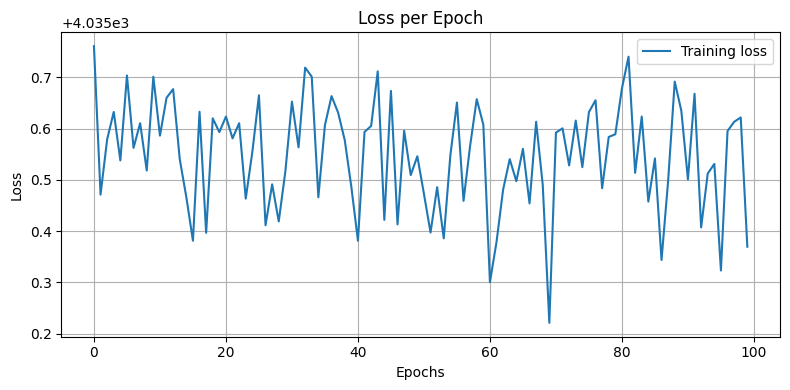

439/439 [==============================] - 44s 100ms/step
   imbalance_price predicted   test
0          114.895 -2.156085   True
1          112.156 -2.156085  False
2           98.087 -2.156085  False
3           77.703 -2.156085  False
4           71.916 -2.156085  False

 Results for 48 uur bi 6 lagen
------------------------
R² Score:       -0.0000
MSE (test):     4116.0806
MSE (train):    4035.3033
MAE:            47.5444
RMSE:           64.1567
MAPE:           136.69%
nRMSE (mean):   -32.1902
nMAE (mean):    -23.8551
trainings time: /Users/pepijn/Documents/Data/bi/bi6_time


In [5]:
### BI - 48 hours ###
bi_xtrain = f'{file_path}/bi/bi_xtrain'
bi_xtest = f'{file_path}/bi/bi_xtest'
bi_indtrain = f'{file_path}/bi/bi_indtrain'
bi_indtest = f'{file_path}/bi/bi_indtest'
bi_dataset = f'{file_path}/bi/bi_dataset'


results(keras=f'{file_path}/bi/bi1.keras', hist=f'{file_path}/bi/biHist1',
    model_name='48 uur bi 1 laag',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=48, future=4, dataset=bi_dataset, time=f'{file_path}/bi/bi1_time')

results(keras=f'{file_path}/bi/bi2.keras', hist=f'{file_path}/bi/biHist2',
    model_name='48 uur bi 2 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=48, future=4, dataset=bi_dataset, time=f'{file_path}/bi/bi2_time')

results(keras=f'{file_path}/bi/bi3.keras', hist=f'{file_path}/bi/biHist3.txt',
    model_name='48 uur bi 3 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=48, future=4, dataset=bi_dataset, time=f'{file_path}/bi/bi3_time.txt')


results(keras=f'{file_path}/bi/bi4.keras', hist=f'{file_path}/bi/biHist4.txt',
    model_name='48 uur bi 4 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=48, future=4, dataset=bi_dataset, time=f'{file_path}/bi/bi4_time.txt')


results(keras=f'{file_path}/bi/bi5.keras', hist=f'{file_path}/bi/biHist5.txt',
    model_name='48 uur bi 5 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=48, future=4, dataset=bi_dataset, time=f'{file_path}/bi/bi5_time.txt')


results(keras=f'{file_path}/bi/bi6.keras', hist=f'{file_path}/bi/biHist6',
    model_name='48 uur bi 6 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=48, future=4, dataset=bi_dataset, time=f'{file_path}/bi/bi6_time')


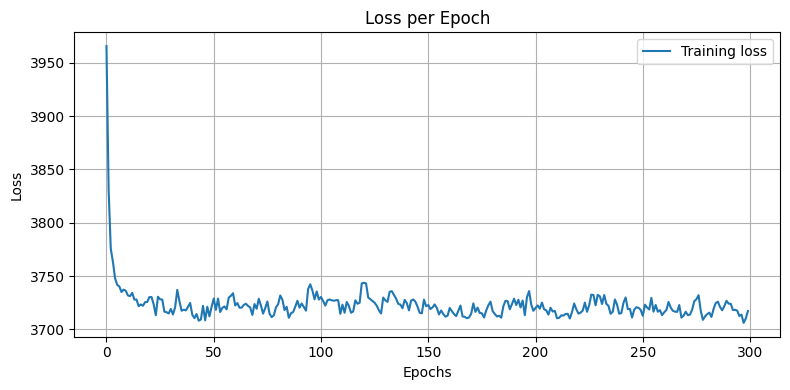

3944/3944 ━━━━━━━━━━━━━━━━━━━━ 3s 671us/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
   imbalance_price predicted   test
0           40.288  43.35619   True
1           30.228  43.35619  False
2           88.806  43.35619  False
3           99.691  43.35619  False
4          187.661  43.35619  False

 Results for 24 uur bi 1 laag
------------------------
R² Score:       0.0798
MSE (test):     3693.4266
MSE (train):    3727.9249
MAE:            45.4879
RMSE:           60.7736
MAPE:           241.59%
nRMSE (mean):   -25.8677
nMAE (mean):    -19.3615
trainings time: /Users/pepijn/Documents/Data/bi/24bi1_time


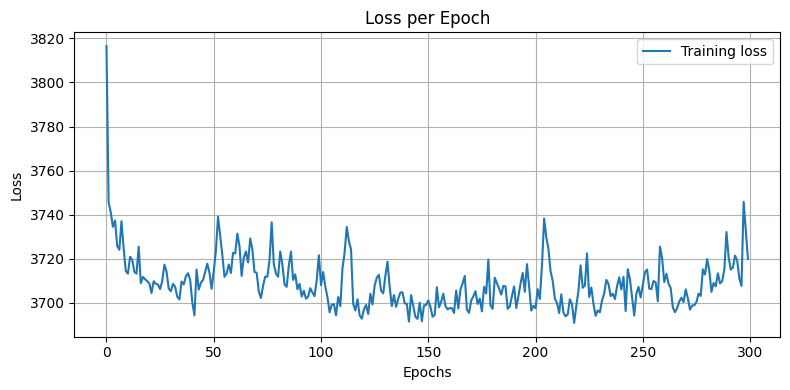

3944/3944 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   imbalance_price  predicted   test
0           40.288  20.377893   True
1           30.228  20.177458  False
2           88.806  20.406694  False
3           99.691  20.149744  False
4          187.661  19.959635  False

 Results for 24 uur bi 2 lagen
------------------------
R² Score:       0.0730
MSE (test):     3720.7531
MSE (train):    3720.0563
MAE:            45.6566
RMSE:           60.9980
MAPE:           218.87%
nRMSE (mean):   -25.9632
nMAE (mean):    -19.4333
trainings time: /Users/pepijn/Documents/Data/bi/24bi2_time


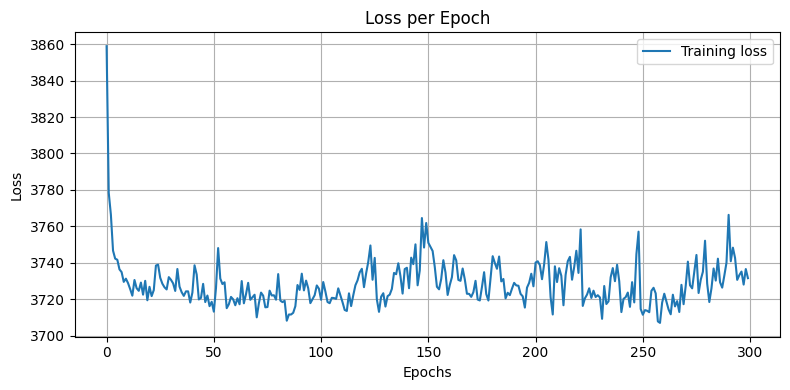

3944/3944 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
   imbalance_price  predicted   test
0           40.288  28.058508   True
1           30.228  28.058508  False
2           88.806  28.058508  False
3           99.691  28.058508  False
4          187.661  28.058508  False

 Results for 24 uur bi 3 lagen
------------------------
R² Score:       0.0722
MSE (test):     3723.9819
MSE (train):    3715.3469
MAE:            45.6728
RMSE:           61.0244
MAPE:           221.42%
nRMSE (mean):   -25.9745
nMAE (mean):    -19.4402
trainings time: /Users/pepijn/Documents/Data/bi/24bi3_time


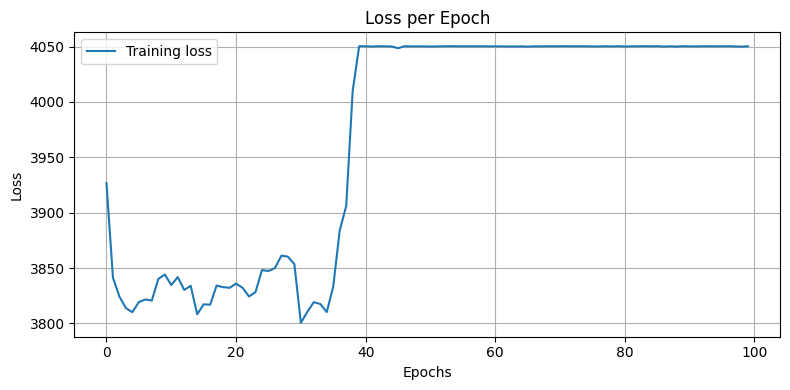

3944/3944 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
   imbalance_price predicted   test
0           40.288 -1.563173   True
1           30.228 -1.563173  False
2           88.806 -1.563173  False
3           99.691 -1.563173  False
4          187.661 -1.563173  False

 Results for 24 uur bi 4 lagen
------------------------
R² Score:       -0.0002
MSE (test):     4014.2318
MSE (train):    4049.8842
MAE:            47.5399
RMSE:           63.3580
MAPE:           111.67%
nRMSE (mean):   -26.9677
nMAE (mean):    -20.2349
trainings time: /Users/pepijn/Documents/Data/bi/24bi4_time


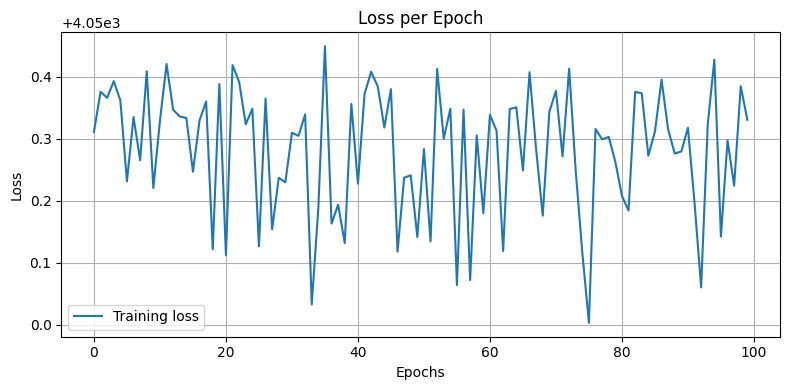

3944/3944 ━━━━━━━━━━━━━━━━━━━━ 105s 27ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step
   imbalance_price predicted   test
0           40.288 -2.495101   True
1           30.228 -2.495101  False
2           88.806 -2.495101  False
3           99.691 -2.495101  False
4          187.661 -2.495101  False

 Results for 24 uur bi 5 lagen
------------------------
R² Score:       -0.0000
MSE (test):     4013.6427
MSE (train):    4050.5163
MAE:            47.5282
RMSE:           63.3533
MAPE:           120.33%
nRMSE (mean):   -26.9658
nMAE (mean):    -20.2299
trainings time: /Users/pepijn/Documents/Data/bi/24bi5_time


In [33]:
### BI - 24 hours ###
bi_xtrain = f'{file_path}/bi/bi24_xtrain'
bi_xtest = f'{file_path}/bi/bi24_xtest'
bi_indtrain = f'{file_path}/bi/bi24_indtrain'
bi_indtest = f'{file_path}/bi/bi24_indtest'
bi_dataset = f'{file_path}/bi/bi24_dataset'


results(keras=f'{file_path}/bi/24bi1.keras', hist=f'{file_path}/bi/24biHist1',
    model_name='24 uur bi 1 laag',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=24, future=4, dataset=bi_dataset, time=f'{file_path}/bi/24bi1_time')

results(keras=f'{file_path}/bi/24bi2.keras', hist=f'{file_path}/bi/24biHist2',
    model_name='24 uur bi 2 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=24, future=4, dataset=bi_dataset, time=f'{file_path}/bi/24bi2_time')

results(keras=f'{file_path}/bi/24bi3.keras', hist=f'{file_path}/bi/24biHist3',
    model_name='24 uur bi 3 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=24, future=4, dataset=bi_dataset, time=f'{file_path}/bi/24bi3_time')


results(keras=f'{file_path}/bi/24bi4.keras', hist=f'{file_path}/bi/24biHist4',
    model_name='24 uur bi 4 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=24, future=4, dataset=bi_dataset, time=f'{file_path}/bi/24bi4_time')


results(keras=f'{file_path}/bi/24bi5.keras', hist=f'{file_path}/bi/24biHist5',
    model_name='24 uur bi 5 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=24, future=4, dataset=bi_dataset, time=f'{file_path}/bi/24bi5_time')


results(keras=f'{file_path}/bi/24bi6.keras', hist=f'{file_path}/bi/24biHist6',
    model_name='24 uur bi 6 lagen',
    xtrain=bi_xtrain, xtest=gru_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=24, future=4, dataset=bi_dataset, time=f'{file_path}/bi/24bi6_time')


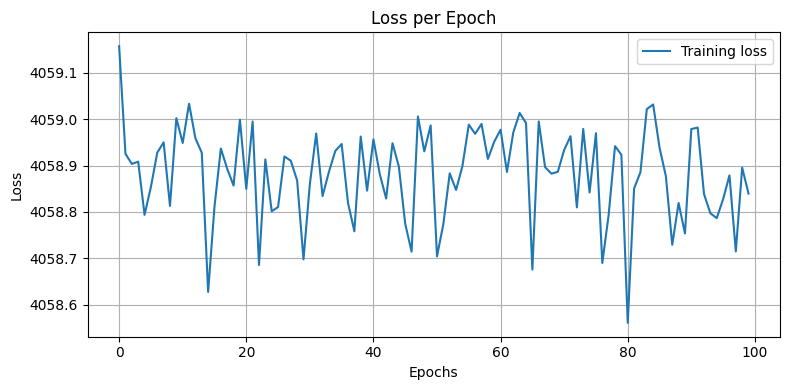

3944/3944 ━━━━━━━━━━━━━━━━━━━━ 109s 28ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step
   imbalance_price predicted   test
0          114.045 -1.996956   True
1          107.169 -1.996956  False
2          126.382 -1.996956  False
3          129.932 -1.996956  False
4          116.233 -1.996956  False

 Results for 12 uur bi 6 lagen
------------------------
R² Score:       -0.0002
MSE (test):     3948.4330
MSE (train):    4058.5125
MAE:            47.0162
RMSE:           62.8366
MAPE:           115.16%
nRMSE (mean):   -51.8623
nMAE (mean):    -38.8049
trainings time: /Users/pepijn/Documents/Data/bi/12bi6_time.txt


In [5]:
### BI - 12 hours ###
bi_xtrain = f'{file_path}/bi/bi12_xtrain'
bi_xtest = f'{file_path}/bi/bi12_xtest'
bi_indtrain = f'{file_path}/bi/bi12_indtrain'
bi_indtest = f'{file_path}/bi/bi12_indtest'
bi_dataset = f'{file_path}/bi/bi12_dataset'


results(keras=f'{file_path}/bi/12bi1.keras', hist=f'{file_path}/bi/12biHist1',
    model_name='12 uur bi 1 laag',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=12, future=4, dataset=bi_dataset, time=f'{file_path}/bi/12bi1_time')

results(keras=f'{file_path}/bi/12bi2.keras', hist=f'{file_path}/bi/12biHist2',
    model_name='12 uur bi 2 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=12, future=4, dataset=bi_dataset, time=f'{file_path}/bi/12bi2_time')

results(keras=f'{file_path}/bi/12bi3.keras', hist=f'{file_path}/bi/12biHist3',
    model_name='12 uur bi 3 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=12, future=4, dataset=bi_dataset, time=f'{file_path}/bi/12bi3_time')


results(keras=f'{file_path}/bi/12bi4.keras', hist=f'{file_path}/bi/12biHist4',
    model_name='12 uur bi 4 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=12, future=4, dataset=bi_dataset, time=f'{file_path}/bi/12bi4_time')


results(keras=f'{file_path}/bi/12bi5.keras', hist=f'{file_path}/bi/12biHist5',
    model_name='12 uur bi 5 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=12, future=4, dataset=bi_dataset, time=f'{file_path}/bi/12bi5_time')


results(keras=f'{file_path}/bi/12bi6.keras', hist=f'{file_path}/bi/12biHist6',
    model_name='12 uur bi 6 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=12, future=4, dataset=bi_dataset, time=f'{file_path}/bi/12bi6_time.txt')


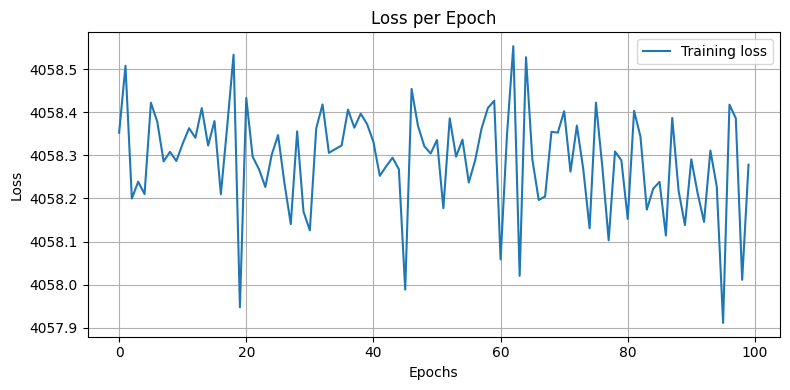

3945/3945 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
   imbalance_price predicted   test
0           61.455 -1.601306   True
1           55.943 -1.601306  False
2           73.747 -1.601306  False
3           52.452 -1.601306  False
4          105.008 -1.601306  False

 Results for 4 uur bi 6 lagen
------------------------
R² Score:       -0.0000
MSE (test):     3954.1267
MSE (train):    4057.9161
MAE:            47.5962
RMSE:           62.8818
MAPE:           119.86%
nRMSE (mean):   -48.1039
nMAE (mean):    -36.4106
trainings time: /Users/pepijn/Documents/Data/bi/4bi6_time


In [6]:
### BI - 4 hours ###
bi_xtrain = f'{file_path}/bi/bi4_xtrain'
bi_xtest = f'{file_path}/bi/bi4_xtest'
bi_indtrain = f'{file_path}/bi/bi4_indtrain'
bi_indtest = f'{file_path}/bi/bi4_indtest'
bi_dataset = f'{file_path}/bi/bi4_dataset'


results(keras=f'{file_path}/bi/4bi1.keras', hist=f'{file_path}/bi/4biHist1',
    model_name='4 uur bi 1 laag',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=4, future=4, dataset=bi_dataset, time=f'{file_path}/bi/4bi1_time')

results(keras=f'{file_path}/bi/4bi2.keras', hist=f'{file_path}/bi/4biHist2',
    model_name='4 uur bi 2 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=4, future=4, dataset=bi_dataset, time=f'{file_path}/bi/4bi2_time')

results(keras=f'{file_path}/bi/4bi3.keras', hist=f'{file_path}/bi/4biHist3',
    model_name='4 uur bi 3 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=4, future=4, dataset=bi_dataset, time=f'{file_path}/bi/4bi3_time')


results(keras=f'{file_path}/bi/4bi4.keras', hist=f'{file_path}/bi/4biHist4',
    model_name='4 uur bi 4 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=4, future=4, dataset=bi_dataset, time=f'{file_path}/bi/4bi4_time')


results(keras=f'{file_path}/bi/4bi5.keras', hist=f'{file_path}/bi/4biHist5',
    model_name='4 uur bi 5 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=4, future=4, dataset=bi_dataset, time=f'{file_path}/bi/4bi5_time')

results(keras=f'{file_path}/bi/4bi6.keras', hist=f'{file_path}/bi/4biHist6',
    model_name='4 uur bi 6 lagen',
    xtrain=bi_xtrain, xtest=bi_xtest,
    indtrain=bi_indtrain, indtest=bi_indtest,
    duration=4, future=4, dataset=bi_dataset, time=f'{file_path}/bi/4bi6_time')


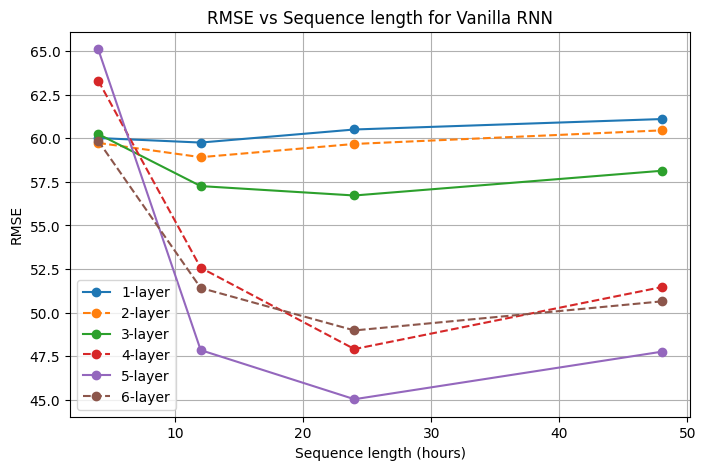

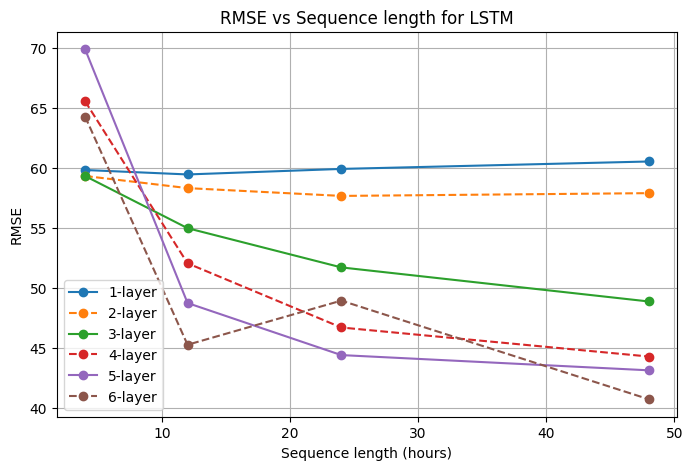

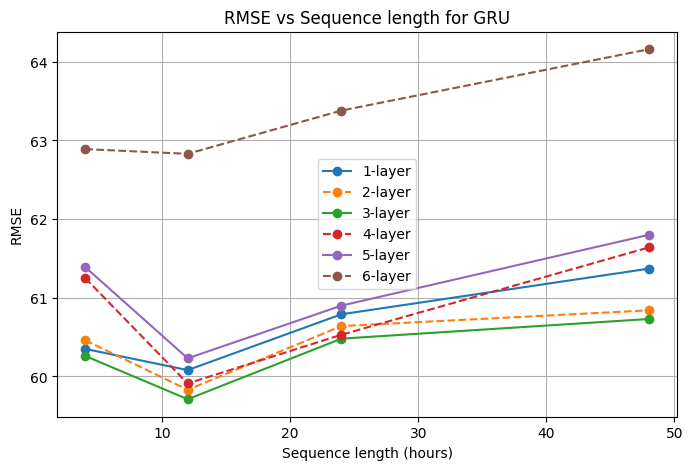

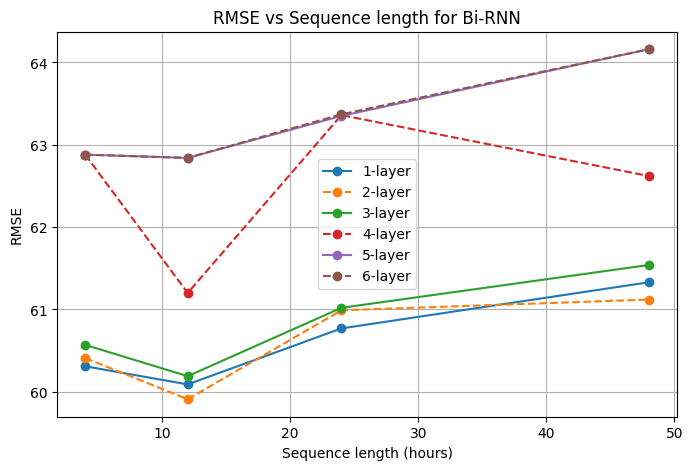

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

data_vanilla = {
    "Sequence length (hours)": [4, 12, 24, 48],
    "RMSE_Layer_1": [60.02, 59.76, 60.51, 61.11],
    "RMSE_Layer_2": [59.74, 58.92, 59.68, 60.46],
    "RMSE_Layer_3": [60.25, 57.26, 56.72, 58.14],
    "RMSE_Layer_4": [63.32, 52.57, 47.90, 51.46],
    "RMSE_Layer_5": [65.12, 47.84, 45.02, 47.75],
    "RMSE_Layer_6": [59.86, 51.41, 48.97, 50.64]
}

data_lstm = {
    "Sequence length (hours)": [4, 12, 24, 48],
    "RMSE_Layer_1": [59.86, 59.49, 59.95, 60.57],
    "RMSE_Layer_2": [59.36, 58.35, 57.70, 57.93],
    "RMSE_Layer_3": [59.36, 55.01, 51.74, 48.9],
    "RMSE_Layer_4": [65.59, 52.08, 46.73, 44.31],
    "RMSE_Layer_5": [69.93, 48.77, 44.43, 43.16],
    "RMSE_Layer_6": [64.32, 45.29, 48.97, 40.75]
}

data_gru = {
    "Sequence length (hours)": [4, 12, 24, 48],
    "RMSE_Layer_1": [60.35, 60.08, 60.79, 61.37],
    "RMSE_Layer_2": [60.46, 59.83, 60.64, 60.84],
    "RMSE_Layer_3": [60.26, 59.71, 60.48, 60.73],
    "RMSE_Layer_4": [61.25, 59.91, 60.53, 61.64],
    "RMSE_Layer_5": [61.39, 60.23, 60.90, 61.80],
    "RMSE_Layer_6": [62.89, 62.83, 63.38, 64.16]
}

data_bi = {
    "Sequence length (hours)": [4, 12, 24, 48],
    "RMSE_Layer_1": [60.31, 60.09, 60.77, 61.33],
    "RMSE_Layer_2": [60.41, 59.91, 60.99, 61.12],
    "RMSE_Layer_3": [60.57, 60.19, 61.02, 61.54],
    "RMSE_Layer_4": [62.88, 61.20, 63.36, 62.62],
    "RMSE_Layer_5": [62.88, 62.84, 63.35, 64.16],
    "RMSE_Layer_6": [62.88, 62.84, 63.37, 64.16]
}


def plot_rmse(data, model_name):
    # Create a DataFrame
    df = pd.DataFrame(data)
    plt.figure(figsize=(8, 5))
    
    for layer in range(1, 7):
        plt.plot(df["Sequence length (hours)"], df[f"RMSE_Layer_{layer}"], label=f"{layer}-layer", marker='o', linestyle='-' if layer % 2 == 1 else '--')
    
    plt.xlabel("Sequence length (hours)")
    plt.ylabel("RMSE")
    plt.title(f"RMSE vs Sequence length for {model_name}")
    plt.legend()
    plt.grid()
    # plt.tight_layout()
    plt.show()


plot_rmse(data_vanilla, "Vanilla RNN")
plot_rmse(data_lstm, "LSTM")
plot_rmse(data_gru, "GRU")
plot_rmse(data_bi, "Bi-RNN")

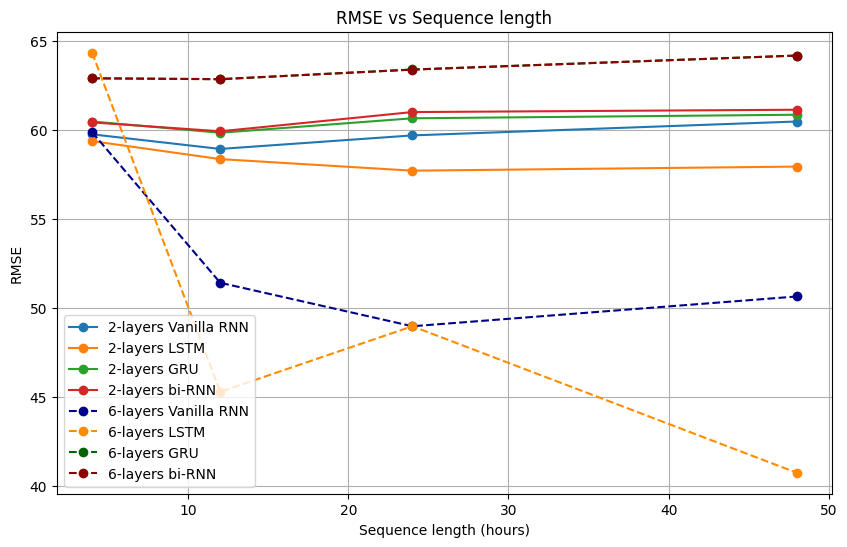

In [19]:
data_2_6 = {
    "Sequence length (hours)": [4, 12, 24, 48],
    "Layer_2_vanilla": [59.74, 58.92, 59.68, 60.46],
    "Layer_6_vanilla": [59.86, 51.41, 48.97, 50.64],
    "Layer_2_lstm": [59.36, 58.35, 57.70, 57.93],
    "Layer_6_lstm": [64.32, 45.29, 48.97, 40.75],
    "Layer_2_gru": [60.46, 59.83, 60.64, 60.84],
    "Layer_6_gru": [62.89, 62.83, 63.38, 64.16],
    "Layer_2_bi": [60.41, 59.91, 60.99, 61.12],
    "Layer_6_bi": [62.88, 62.84, 63.37, 64.16]
}

df = pd.DataFrame(data_2_6)
plt.figure(figsize=(10, 6))
plt.plot(df["Sequence length (hours)"], df["Layer_2_vanilla"], label="2-layers Vanilla RNN", marker='o', linestyle='-')
plt.plot(df["Sequence length (hours)"], df["Layer_2_lstm"], label="2-layers LSTM", marker='o', linestyle='-')
plt.plot(df["Sequence length (hours)"], df["Layer_2_gru"], label="2-layers GRU", marker='o', linestyle='-')
plt.plot(df["Sequence length (hours)"], df["Layer_2_bi"], label="2-layers bi-RNN", marker='o', linestyle='-')

plt.plot(df["Sequence length (hours)"], df["Layer_6_vanilla"], label="6-layers Vanilla RNN", marker='o', linestyle='--', color='darkblue')
plt.plot(df["Sequence length (hours)"], df["Layer_6_lstm"], label="6-layers LSTM", marker='o', linestyle='--', color='darkorange')
plt.plot(df["Sequence length (hours)"], df["Layer_6_gru"], label="6-layers GRU", marker='o', linestyle='--', color='darkgreen')
plt.plot(df["Sequence length (hours)"], df["Layer_6_bi"], label="6-layers bi-RNN", marker='o', linestyle='--', color='darkred')
    
plt.xlabel("Sequence length (hours)")
plt.ylabel("RMSE")
plt.title(f"RMSE vs Sequence length")
plt.legend()
plt.grid()
plt.show()


# plot_rmse(data_2_6, "all")